# This demo shows how to do a general search for similar images

This demo is setup using python3

Follow up more information on product webpage: https://help.aliyun.com/document_detail/113827.html

## flow:
1. imagesearch_product to get product category (my_image_search with instanceName_Product)
2. imagesearch_general to upload images with detected category
3. imagesearch_general to find similar images (my_image_search with instanceName_General)

In [1]:
#setup envionrmnet for python depedency if necessary
! pip3 install aliyun-python-sdk-imagesearch #--upgrade 
! pip3 install pillow #--upgrade 

# Get access credential from environemnt setting

In [2]:
import os
accessKeyId = os.environ.get('accessKeyId', 'not_set')
accessKeySecret = os.environ.get('accessKeySecret', 'not_set')
instanceName_Product = os.environ.get('instanceName_Product', 'not_set')
instanceName_General = os.environ.get('instanceName_General', 'not_set')

print(instanceName_Product, instanceName_General)

jhsimagesearchproduct1 jhsimagesearchgeneral1


In [3]:
# setup image search connection
product = "ImageSearch"
region = 'cn-shanghai' # , ap-southeast-1(sg)

domain = 'imagesearch.cn-shanghai.aliyuncs.com' # 
endpoint = 'imagesearch.cn-shanghai.aliyuncs.com' # 

from aliyunsdkcore.profile import region_provider
from aliyunsdkcore.client import AcsClient
region_provider.add_endpoint(product, region, domain)
client  = AcsClient(accessKeyId, accessKeySecret, region)
requestClient = client

# Load supporting function

In [4]:
%load_ext autoreload
%autoreload 2
from myutil import *

# Demo for single image upload and detect object category

image path: 1.jpg /Users/jhs/070_code/AlibabaCloud_ImageSearch_Demo_py2/image/1.jpg


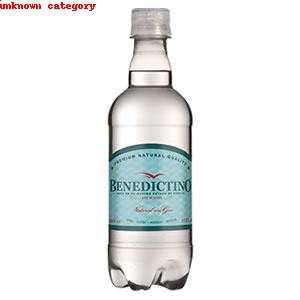

In [5]:
image_name = '1.jpg' 
image_folder = './image' 
image_path = os.path.abspath(image_folder+'/'+image_name)

print("image path:", image_name, image_path)
img1 = my_image_preview(image_path, '0,0,0,0', 'unknown category')
img1

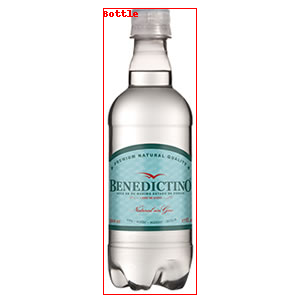

/Users/jhs/070_code/AlibabaCloud_ImageSearch_Demo_py2/image/1.jpg


In [6]:
# test to upload a single image
image_name = '1.jpg'
image_path = os.path.abspath(image_folder+'/'+image_name)
result = my_image_search_for_category_detection_display(requestClient, instanceName_Product, image_path)
print(image_path)

# Upload all images into imagesearch_General with detected category

In [7]:
image_folder = './image' 
images = list_images(image_folder)
#pprint(images)

for image_path in images:
    image_name = images[image_path]
    #image_path = './image/1.jpg'
    
    r = my_image_search_for_category_detection(requestClient, instanceName_Product, image_path)
    cate_id = r['cate_id']
    cate_desc = r['cate_desc']
    obj_region = r['obj_region']
    r = my_image_upload_for_similarity_search(requestClient, endpoint, instanceName_General, image_name, image_name, image_path, cate_id, cate_desc, obj_region)
    
    time.sleep(1)

======= 88888888 HTB1_8UmeYus3KVjSZKbq6xqkFXaq.jpg_350x350.jpg
======= 20 HTB1bb4re7WE3KVjSZSyq6xocXXaK.jpg_350x350.jpg
======= 5 HTB1b5vTXXY7gK0jSZKzq6yikpXaI.jpg_350x350.jpg
======= 5 HTB1mPP7e.WF3KVjSZPhq6xclXXar.jpg_350x350.jpg
======= 5 HTB1c7BPXAL0gK0jSZFxq6xWHVXac.jpg_350x350.jpg
======= 22 HTB10Y5AXBr0gK0jSZFnq6zRRXXai.jpg_350x350.jpg
======= 5 HTB19vore2WG3KVjSZPcq6zkbXXaZ.jpg_350x350.jpg
======= 3 HTB1oAi.eRWD3KVjSZFsq6AqkpXaQ.jpg_350x350.jpg
======= 5 HTB1u7DfXhD1gK0jSZFsq6zldVXaH.jpg_350x350.jpg
======= 0 HTB1QAdxdkxz61VjSZFrq6xeLFXaz.jpg_350x350.jpg
======= 8 1.jpg


# Search similar images

In [8]:
#result = my_image_search_for_similarity(requestClient, instanceName_General, './image/1.jpg')


./image/HTB1_8UmeYus3KVjSZKbq6xqkFXaq.jpg_350x350.jpg
similar score:  2.86870360374451;244 similar image:  ./image/HTB1oAi.eRWD3KVjSZFsq6AqkpXaQ.jpg_350x350.jpg


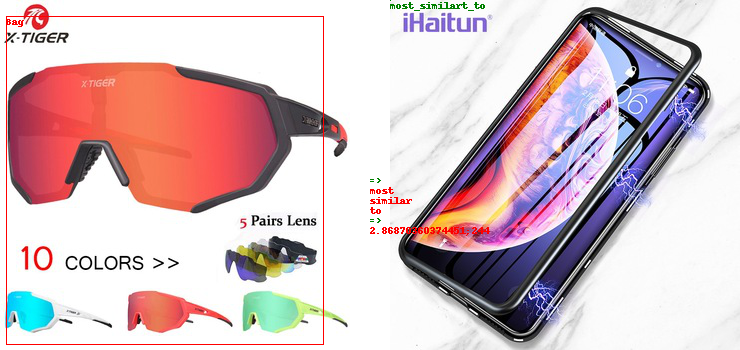

./image/HTB1bb4re7WE3KVjSZSyq6xocXXaK.jpg_350x350.jpg
similar score:  2.76821422576904;249 similar image:  ./image/HTB1oAi.eRWD3KVjSZFsq6AqkpXaQ.jpg_350x350.jpg


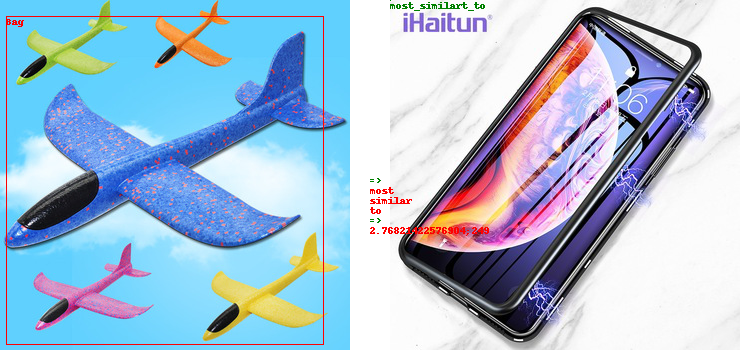

./image/HTB1b5vTXXY7gK0jSZKzq6yikpXaI.jpg_350x350.jpg
similar score:  4.57184171676636;203 similar image:  ./image/HTB1c7BPXAL0gK0jSZFxq6xWHVXac.jpg_350x350.jpg


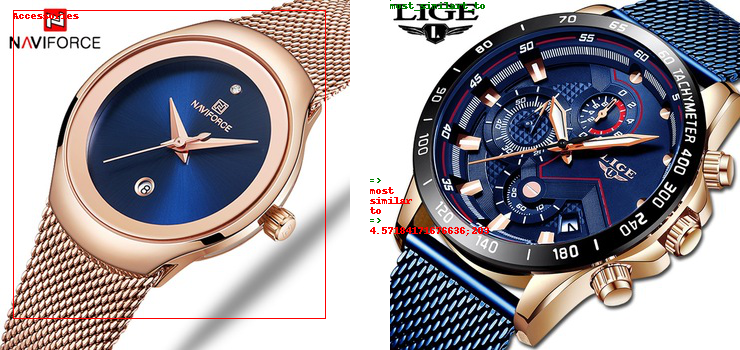

./image/HTB1mPP7e.WF3KVjSZPhq6xclXXar.jpg_350x350.jpg
similar score:  5.92934370040894;158 similar image:  ./image/HTB1c7BPXAL0gK0jSZFxq6xWHVXac.jpg_350x350.jpg


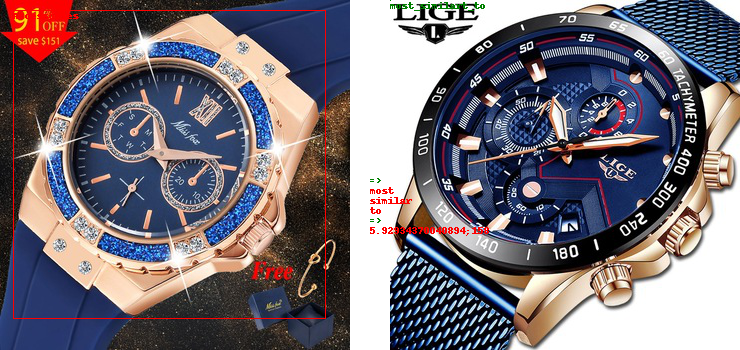

./image/HTB1c7BPXAL0gK0jSZFxq6xWHVXac.jpg_350x350.jpg
similar score:  5.92934370040894;158 similar image:  ./image/HTB1mPP7e.WF3KVjSZPhq6xclXXar.jpg_350x350.jpg


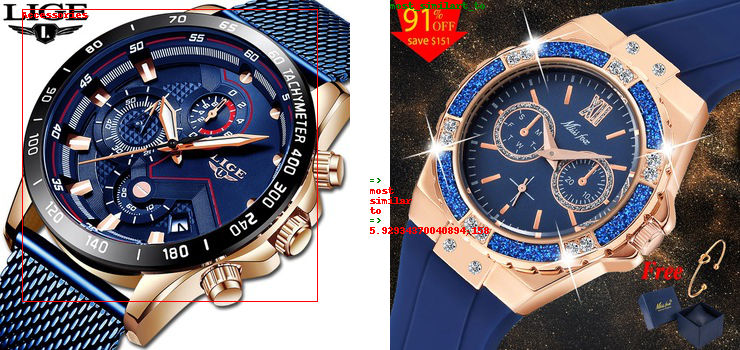

./image/HTB10Y5AXBr0gK0jSZFnq6zRRXXai.jpg_350x350.jpg
similar score:  2.85600447654724;235 similar image:  ./image/HTB1oAi.eRWD3KVjSZFsq6AqkpXaQ.jpg_350x350.jpg


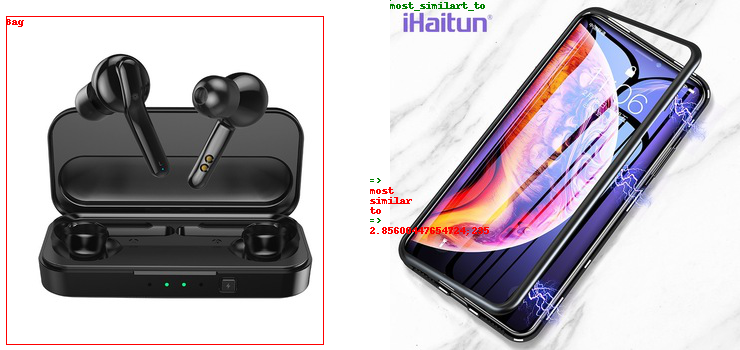

./image/HTB19vore2WG3KVjSZPcq6zkbXXaZ.jpg_350x350.jpg
similar score:  4.93422698974609;195 similar image:  ./image/HTB1c7BPXAL0gK0jSZFxq6xWHVXac.jpg_350x350.jpg


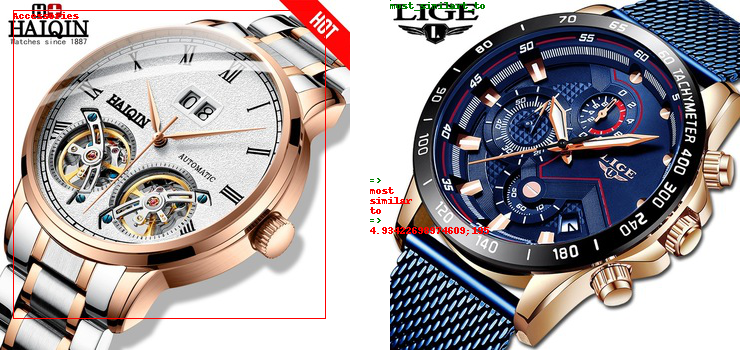

./image/HTB1oAi.eRWD3KVjSZFsq6AqkpXaQ.jpg_350x350.jpg
similar score:  2.9445378780365;256 similar image:  ./image/HTB19vore2WG3KVjSZPcq6zkbXXaZ.jpg_350x350.jpg


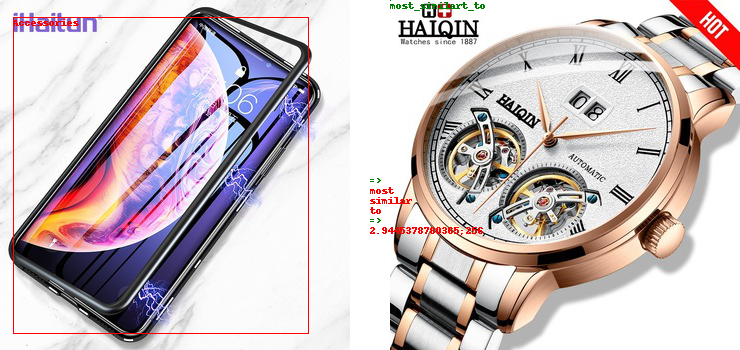

./image/HTB1u7DfXhD1gK0jSZFsq6zldVXaH.jpg_350x350.jpg
similar score:  4.55325651168823;181 similar image:  ./image/HTB1c7BPXAL0gK0jSZFxq6xWHVXac.jpg_350x350.jpg


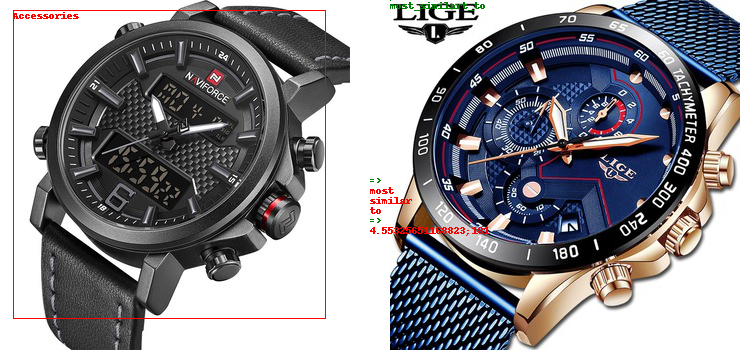

./image/HTB1QAdxdkxz61VjSZFrq6xeLFXaz.jpg_350x350.jpg
similar score:  2.74069666862488;264 similar image:  ./image/HTB1_8UmeYus3KVjSZKbq6xqkFXaq.jpg_350x350.jpg


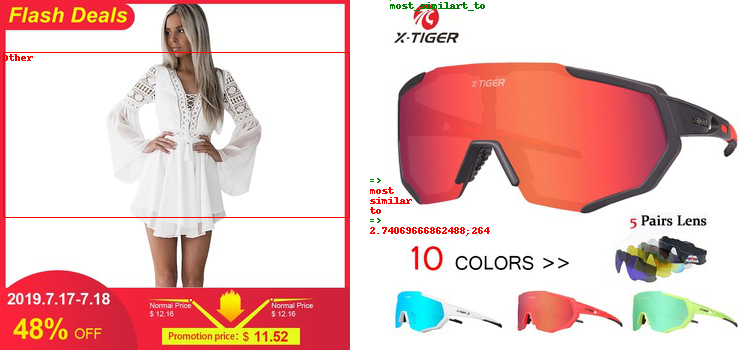

./image/1.jpg
similar score:  2.80684971809387;232 similar image:  ./image/HTB19vore2WG3KVjSZPcq6zkbXXaZ.jpg_350x350.jpg


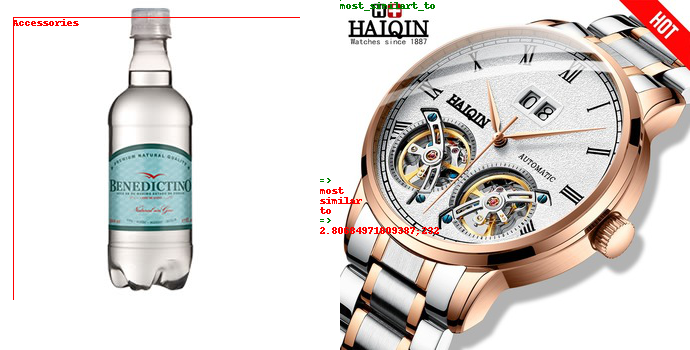

In [9]:
image_folder = './image' 
images = list_images(image_folder)
#pprint(images)

for image_path in images:
    image_name = images[image_path]
    r = my_image_search_for_similarity(requestClient, instanceName_General, image_path)   
    time.sleep(1)

# Delete all images being uploaded

In [10]:
image_folder = './image' 
images = list_images(image_folder)
#pprint(images)

for image_path in images:
    image_name = images[image_path]
    request = DeleteImageRequest.DeleteImageRequest()
    request.set_endpoint(endpoint)
    request.set_InstanceName(instanceName_Product)
    request.set_ProductId(image_name)
    response = client.do_action_with_exception(request)
    print(image_name)
    print(json.loads(response))
    time.sleep(1)

HTB1_8UmeYus3KVjSZKbq6xqkFXaq.jpg_350x350.jpg
{'Message': 'success', 'RequestId': 'BC8A307B-8F9B-4B37-8DE0-97A825982954', 'Success': True, 'Code': 0}
HTB1bb4re7WE3KVjSZSyq6xocXXaK.jpg_350x350.jpg
{'Message': 'success', 'RequestId': '5F99F106-E373-439B-AF69-A77495A15D50', 'Success': True, 'Code': 0}
HTB1b5vTXXY7gK0jSZKzq6yikpXaI.jpg_350x350.jpg
{'Message': 'success', 'RequestId': '06E8D1AE-0DF6-4817-887E-BD0C4DF6FF42', 'Success': True, 'Code': 0}
HTB1mPP7e.WF3KVjSZPhq6xclXXar.jpg_350x350.jpg
{'Message': 'success', 'RequestId': '57AF5C95-D330-4716-9A7A-52714DB83318', 'Success': True, 'Code': 0}
HTB1c7BPXAL0gK0jSZFxq6xWHVXac.jpg_350x350.jpg
{'Message': 'success', 'RequestId': '6EA10076-4E97-4237-8ADB-35ADB83F3153', 'Success': True, 'Code': 0}
HTB10Y5AXBr0gK0jSZFnq6zRRXXai.jpg_350x350.jpg
{'Message': 'success', 'RequestId': '5393078E-CEA6-4799-8C49-0212D88217B5', 'Success': True, 'Code': 0}
HTB19vore2WG3KVjSZPcq6zkbXXaZ.jpg_350x350.jpg
{'Message': 'success', 'RequestId': '1B0935DE-B09A-436